In [25]:
import pandas as pd
import dabest
import matplotlib.pyplot as plt
import numpy as np
metric2index = {
    "Rep":0,
    "K-Fold":1,
    "Frames":2,
    "TP":3,
    "FP":4,
    "FN":5,
    "TN":6,
    "Accuracy":7,
    "Balanced Accuracy":8,
    "F1 score":9,
    "Precision":10,
    "Sensitivity":11,
    "Specificity":12,
    "acc50":13,
    "acc75":14,
    "acc90":15,
    "TP_a":16,
    "FP_a":17,
    "FN_a":18,
    "TN_a":19,
    "acc_a":20,
    "Balanced Accuracy_a":21,
    "F1 score_a":22,
    "Precision_a":23,
    "Sensitivity_a":24,
    "Specificity_a":25,
    "TP_ss":26,
    "FP_ss":27,
    "FN_ss":28,
    "TN_ss":29,
    "Accuracy_ss":30,
    "Balanced Accuracy_ss":31,
    "F1 score_ss":32,
    "Precision_ss":33,
    "Sensitivity_ss":34,
    "Specificity_ss":35,
    "acc50_ss":36,
    "acc75_ss":37,
    "acc90_ss":38,
    "TP_a_ss":39,
    "FP_a_ss":40,
    "FN_a_ss":41,
    "TN_a_ss":42,
    "acc_a_ss":43,
    "Balanced Accuracy_a_ss":44,
    "F1 score_a_ss":45,
    "Precision_a_ss":46,
    "Sensitivity_a_ss":47,
    "Specificity_a_ss":48,

}

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


def load_dataframe_from_csv(fps):
    df_stack = pd.DataFrame({})
    for fp in fps:
        df = pd.read_csv(fp,sep='\t',header=None)
        df_stack = df_stack.append(df)
    return df_stack

def print_column(df,std=True):
    meanz = np.round(df.mean(axis = 0).to_numpy(),2)
    stdz = np.round(df.std(axis = 0).to_numpy(),2)

    for x in [10,11,2,3,6,7,8,9,0,1,4,5]:
        if std:
            print("{:.2f}$\pm${:.2f}".format(meanz[x],stdz[x]))

In [26]:
df = load_dataframe_from_csv(["data/log_final_10x4_ .txt","data/log_final_10x4_1txt"])

In [27]:
ii1 = " f. lung"
ii2 = " f. ctr."
selected_metric = "Balanced Accuracy"

identifier1 = df[metric2index["Frames"]].astype(str) + ii1
identifier = identifier1.append(df[metric2index["Frames"]].astype(str)+ ii2)

metric1 =df[metric2index[selected_metric]]
metric = metric1.append(df[metric2index[selected_metric+"_ss"]])

dict_data = {'Method':identifier,
             selected_metric:metric}
data = pd.DataFrame(dict_data)

ixx = np.tile(np.arange(0,40),12)

data['future_index'] = ixx


data_pivot = data.pivot(index="future_index",
                        columns="Method",
                        values=selected_metric)
data_pivot['id'] = np.arange(0,40)

print_column(df=data_pivot)

0.71$\pm$0.10
0.71$\pm$0.07
0.77$\pm$0.09
0.76$\pm$0.08
0.79$\pm$0.08
0.77$\pm$0.08
0.81$\pm$0.07
0.78$\pm$0.07
0.78$\pm$0.13
0.74$\pm$0.11
0.66$\pm$0.17
0.62$\pm$0.15


### Unpaired test 5 time 2

/home/miro/anaconda3/envs/advanced-computer-vision/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


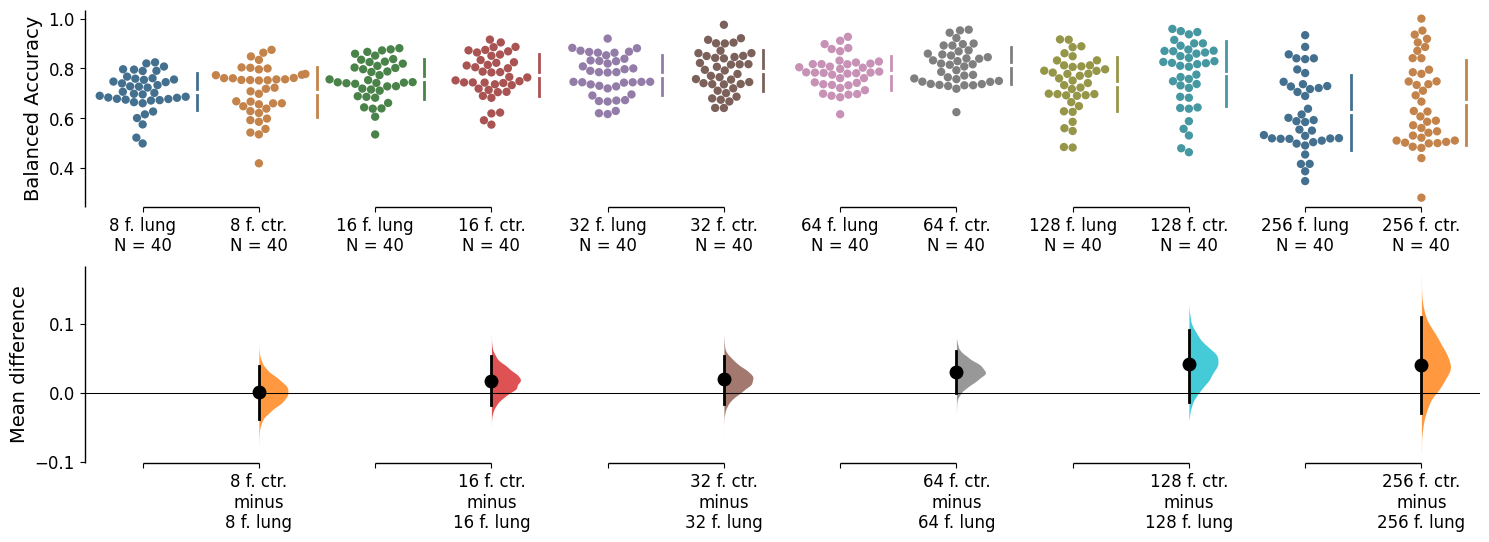

In [28]:
dabest_s = dabest.load(data=data_pivot,
                        idx=(("8"+ii1,"8"+ii2),
                            ("16"+ii1,"16"+ii2),
                             ("32"+ii1, "32"+ii2),
                            ("64"+ii1, "64"+ii2),
                            ("128"+ii1, "128"+ii2),
                            ("256"+ii1, "256"+ii2),
                             ))
fig = dabest_s.mean_diff.plot(swarm_label=selected_metric);
fig.patch.set_facecolor('white')

###  Agreggated paired test 5 time 2

/home/miro/anaconda3/envs/advanced-computer-vision/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  
/home/miro/anaconda3/envs/advanced-computer-vision/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


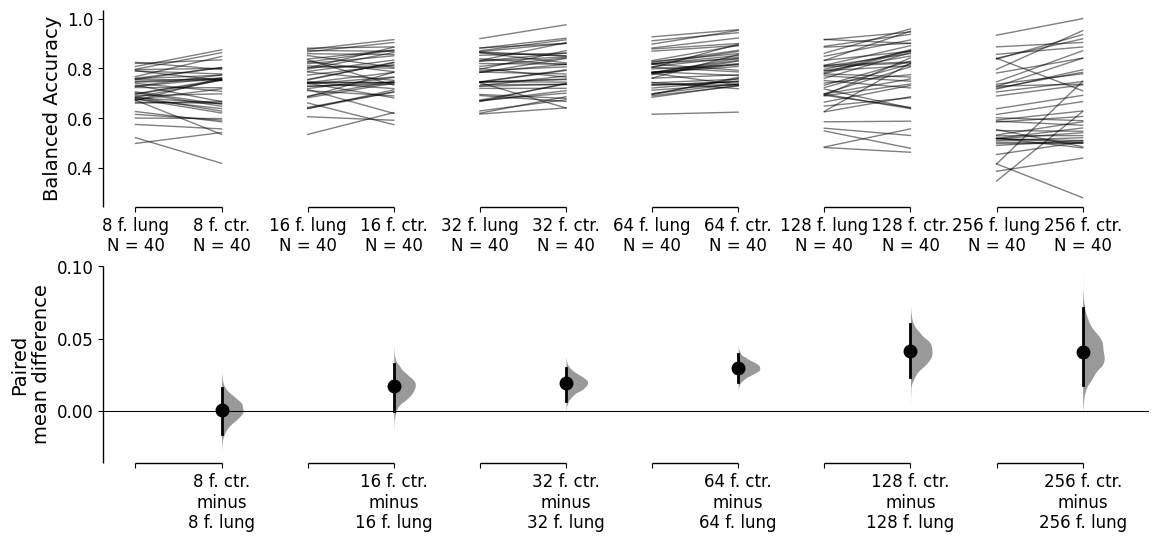

In [29]:
dabest_s = dabest.load(data=data_pivot,
                        paired=True,
                        id_col='id',
                        idx=(("8"+ii1,"8"+ii2),
                            ("16"+ii1,"16"+ii2),
                             ("32"+ii1, "32"+ii2),
                            ("64"+ii1, "64"+ii2),
                            ("128"+ii1, "128"+ii2),
                            ("256"+ii1, "256"+ii2),
                             ))

fig = dabest_s.mean_diff.plot(swarm_label=selected_metric);
fig.patch.set_facecolor('white')
plt.tight_layout()

### Unpaired test 1vs9

/home/miro/anaconda3/envs/advanced-computer-vision/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


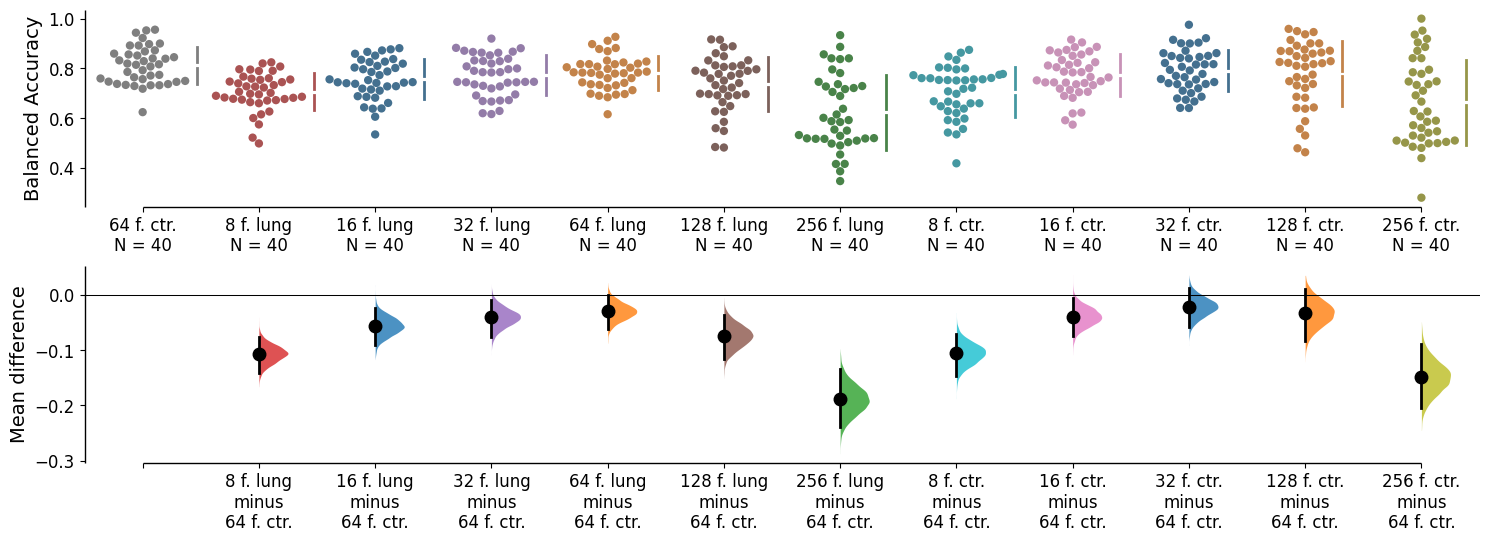

In [30]:
dabest_s = dabest.load(data=data,
                        x="Method",
                        y=selected_metric,
                        idx=("64"+ii2,
                            "8"+ii1,
                            "16"+ii1,
                             "32"+ii1,
                            "64"+ii1,
                             "128"+ii1,
                             "256"+ii1,
                             "8"+ii2,
                             "16"+ii2,
                            "32"+ii2,
                             "128"+ii2,
                             "256"+ii2,
                             ))


fig = dabest_s.mean_diff.plot(swarm_label=selected_metric);
fig.patch.set_facecolor('white')

## Aggregated metric comparison

In [31]:
selected_agg_metric = "Balanced Accuracy_a"

identifier1 = df[metric2index["Frames"]].astype(str) + ii1
identifier = identifier1.append(df[metric2index["Frames"]].astype(str)+ ii2)

metric1 =df[metric2index[selected_agg_metric]]
metric = metric1.append(df[metric2index[selected_agg_metric+"_ss"]])

dict_data = {'Method':identifier,
             selected_agg_metric:metric}
data = pd.DataFrame(dict_data)

data['future_index'] = ixx


data_pivot = data.pivot(index="future_index",
                 columns="Method",
                 values=selected_agg_metric)
data_pivot['id'] = np.arange(0,40)

print_column(df=data_pivot)

0.75$\pm$0.14
0.78$\pm$0.13
0.86$\pm$0.09
0.88$\pm$0.11
0.86$\pm$0.12
0.89$\pm$0.11
0.89$\pm$0.08
0.91$\pm$0.09
0.81$\pm$0.15
0.81$\pm$0.15
0.70$\pm$0.19
0.68$\pm$0.21


/home/miro/anaconda3/envs/advanced-computer-vision/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/miro/anaconda3/envs/advanced-computer-vision/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/miro/anaconda3/envs/advanced-computer-vision/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


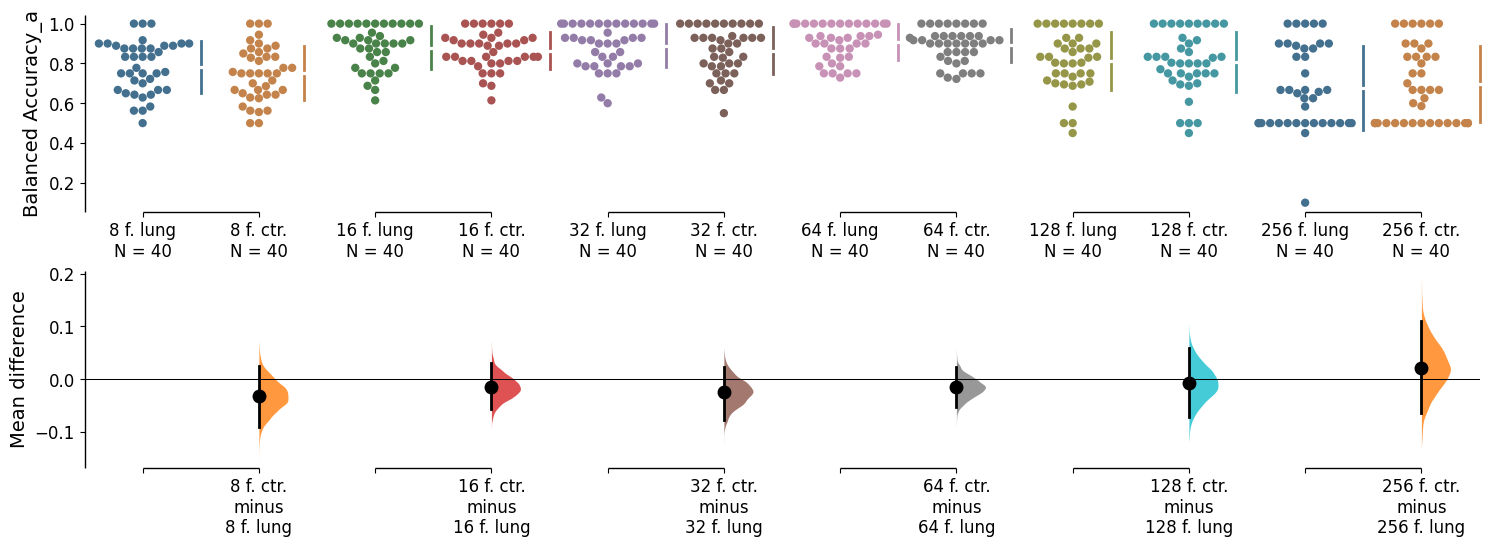

In [32]:
dabest_x = dabest.load(data=data_pivot,
                        idx=(("8"+ii1,"8"+ii2),
                            ("16"+ii1,"16"+ii2),
                             ("32"+ii1, "32"+ii2),
                            ("64"+ii1, "64"+ii2),
                            ("128"+ii1, "128"+ii2),
                            ("256"+ii1, "256"+ii2),
                             ))


fig = dabest_x.mean_diff.plot(swarm_label=selected_agg_metric);
fig.patch.set_facecolor('white')

### Paired test 5 time 2

/home/miro/anaconda3/envs/advanced-computer-vision/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]
/home/miro/anaconda3/envs/advanced-computer-vision/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


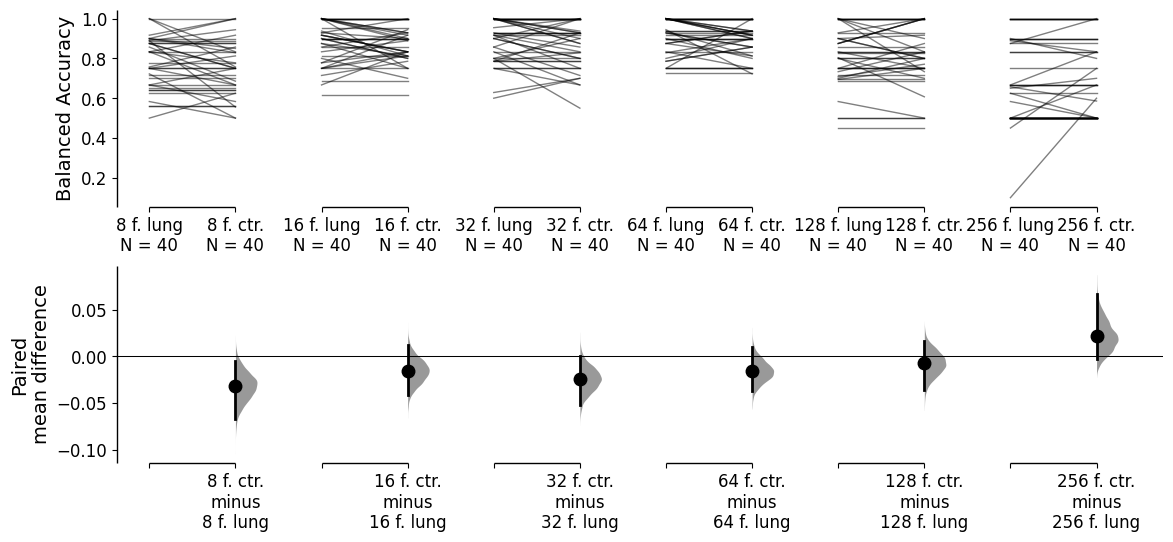

In [33]:
dabest_xx = dabest.load(data=data_pivot,
                        paired=True,
                        id_col='id',
                        idx=(("8"+ii1,"8"+ii2),
                            ("16"+ii1,"16"+ii2),
                             ("32"+ii1, "32"+ii2),
                            ("64"+ii1, "64"+ii2),
                            ("128"+ii1, "128"+ii2),
                            ("256"+ii1, "256"+ii2),
                             ))
fig = dabest_xx.mean_diff.plot(swarm_label="Balanced Accuracy");
fig.patch.set_facecolor('white')
plt.savefig('./figures/paired_aggr_main_comparison.png',dpi=300,bbox_inches='tight')

### Aggregated Unpaired Test 1v9

/home/miro/anaconda3/envs/advanced-computer-vision/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/miro/anaconda3/envs/advanced-computer-vision/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]
/home/miro/anaconda3/envs/advanced-computer-vision/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


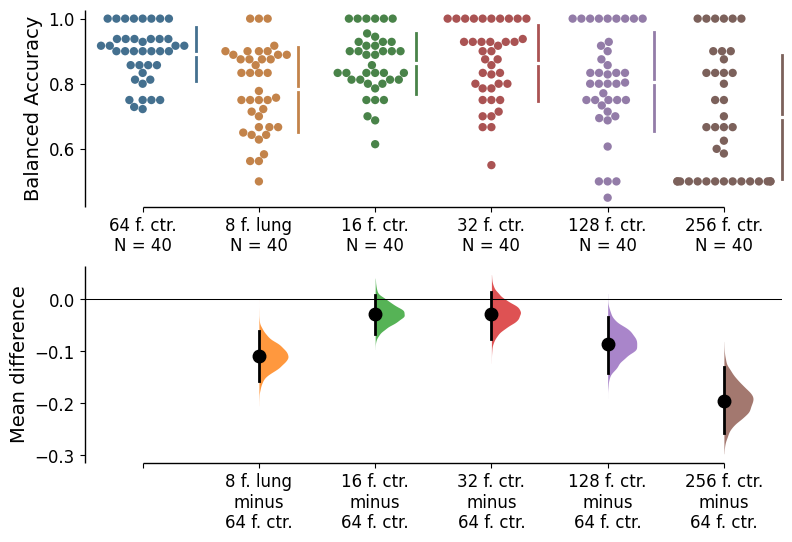

In [34]:
dabest_x = dabest.load(data=data_pivot,
                        idx=(
                            "64"+ii2,
                            "8"+ii1,
                             "16"+ii2,
                             "32"+ii2,
                            "128"+ii2,
                            "256"+ii2,
                             ))

fig = dabest_x.mean_diff.plot(swarm_label="Balanced Accuracy");
fig.patch.set_facecolor('white')
plt.savefig('./figures/aggr_main_comparison.png',dpi=300,bbox_inches='tight')

In [35]:
print(dabest_x.mean_diff)

DABEST v0.3.1
             
Good afternoon!
The current time is Wed Jun  2 14:45:27 2021.

The unpaired mean difference between 64 f. ctr. and 8 f. lung is -0.109 [95%CI -0.157, -0.0607].
The p-value of the two-sided permutation t-test is 0.0. 

The unpaired mean difference between 64 f. ctr. and 16 f. ctr. is -0.0279 [95%CI -0.0661, 0.00924].
The p-value of the two-sided permutation t-test is 0.168. 

The unpaired mean difference between 64 f. ctr. and 32 f. ctr. is -0.0278 [95%CI -0.0755, 0.0152].
The p-value of the two-sided permutation t-test is 0.229. 

The unpaired mean difference between 64 f. ctr. and 128 f. ctr. is -0.0852 [95%CI -0.14, -0.0346].
The p-value of the two-sided permutation t-test is 0.0032. 

The unpaired mean difference between 64 f. ctr. and 256 f. ctr. is -0.194 [95%CI -0.257, -0.13].
The p-value of the two-sided permutation t-test is 0.0. 

5000 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
The p-value(s) reported ar

In [36]:
print(dabest_xx.mean_diff)

DABEST v0.3.1
             
Good afternoon!
The current time is Wed Jun  2 14:45:24 2021.

The paired mean difference between 8 f. lung and 8 f. ctr. is -0.0322 [95%CI -0.067, -0.00445].
The p-value of the two-sided permutation t-test is 0.0492. 

The paired mean difference between 16 f. lung and 16 f. ctr. is -0.0152 [95%CI -0.0415, 0.0118].
The p-value of the two-sided permutation t-test is 0.29. 

The paired mean difference between 32 f. lung and 32 f. ctr. is -0.0244 [95%CI -0.0522, 0.000882].
The p-value of the two-sided permutation t-test is 0.0848. 

The paired mean difference between 64 f. lung and 64 f. ctr. is -0.0155 [95%CI -0.0371, 0.00996].
The p-value of the two-sided permutation t-test is 0.21. 

The paired mean difference between 128 f. lung and 128 f. ctr. is -0.00726 [95%CI -0.0356, 0.0168].
The p-value of the two-sided permutation t-test is 0.599. 

The paired mean difference between 256 f. lung and 256 f. ctr. is 0.0218 [95%CI -0.00264, 0.0666].
The p-value of the t